In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
import pandas as pd


#data = pd.read_excel("OSA_extreme_both.xlsx")


Saving OSA_extreme_both.xlsx to OSA_extreme_both.xlsx
User uploaded file "OSA_extreme_both.xlsx" with length 26018 bytes


In [4]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import numpy as np


data = pd.read_excel("OSA_extreme_both.xlsx")

# summarize shape
print(data.shape)
# summarize first few lines
print(data.head())
X=data[['Gender','Weight','Height','Smoker','Snorer','BMI','Age','Cervical']]
y=data[['IAH']]

X=X.values
y=y.values

scalerX = StandardScaler()
scalerX.fit(X)
X = scalerX.transform(X)

n_alphas = 20
alphas = np.arange(0,1,0.05).tolist()#np.logspace(-10,0, n_alphas)
means = []
stds = []
coefs = []
for alpha in alphas:

  # define model
  model = Ridge(alpha=alpha)
  # define model evaluation method
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  model.fit(X,y)
  print(model.coef_)
  coefs.append(model.coef_)
  # force scores to be positive
  scores = absolute(scores)
  print('Alpha: %.1f Mean MSE: %.3f (%.3f)' % (alpha,mean(scores), std(scores)))
  means.append(mean(scores))
  stds.append(std(scores))


(412, 10)
   Gender   IAH  Weight  Height  ...  Smoker  Snorer        BMI      OSA
0       2  71.0    82.0     168  ...       1       3  29.053288   Severe
1       2   9.0    80.0     173  ...       4       3  26.729927  Healthy
2       2   2.0   109.0     190  ...       4       3  30.193906  Healthy
3       2  34.0    86.0     169  ...       4       3  30.110991   Severe
4       2  60.0   145.0     172  ...       4       3  49.012980   Severe

[5 rows x 10 columns]
[[  0.96631833  27.16515792 -14.06393922   0.26409372   2.70321276
  -18.30709079   3.6402659    7.05622977]]
Alpha: 0.0 Mean MSE: 19.095 (2.498)
[[  0.95412121  26.5342481  -13.73303419   0.26890973   2.70484364
  -17.75778472   3.63972095   7.06945419]]
Alpha: 0.1 Mean MSE: 19.093 (2.492)
[[  0.94257881  25.93474484 -13.41856677   0.27347492   2.70637044
  -17.2357768    3.63920306   7.08190208]]
Alpha: 0.1 Mean MSE: 19.091 (2.486)
[[  0.93164335  25.36436182 -13.1193404    0.27780758   2.70780078
  -16.73907991   3.63871

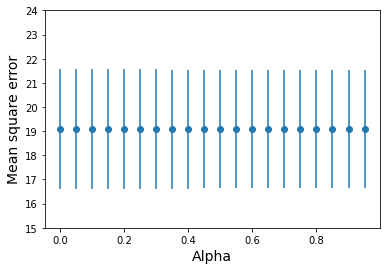

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.errorbar(alphas, means, stds, linestyle='None', marker='o')
#plt.xscale('log')
plt.ylim(15,24)
plt.xlabel("Alpha", fontsize=14)
plt.ylabel("Mean square error", fontsize=14)

plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


[array([[  0.96631833,  27.16515792, -14.06393922,   0.26409372,
          2.70321276, -18.30709079,   3.6402659 ,   7.05622977]]), array([[  0.95412121,  26.5342481 , -13.73303419,   0.26890973,
          2.70484364, -17.75778472,   3.63972095,   7.06945419]]), array([[  0.94257881,  25.93474484, -13.41856677,   0.27347492,
          2.70637044, -17.2357768 ,   3.63920306,   7.08190208]]), array([[  0.93164335,  25.36436182, -13.1193404 ,   0.27780758,
          2.70780078, -16.73907991,   3.63871023,   7.09363017]]), array([[  0.92127159,  24.82102937, -12.83427189,   0.28192424,
          2.70914152, -16.26589522,   3.63824065,   7.10468981]]), array([[  0.91142428,  24.30286939, -12.5623783 ,   0.2858399 ,
          2.71039891, -15.81459043,   3.63779268,   7.11512763]]), array([[  0.90206571,  23.80817374, -12.30276566,   0.28956822,
          2.71157861, -15.38368092,   3.63736481,   7.12498599]]), array([[  0.89316335,  23.33538536, -12.05461908,   0.29312164,
          2.712685

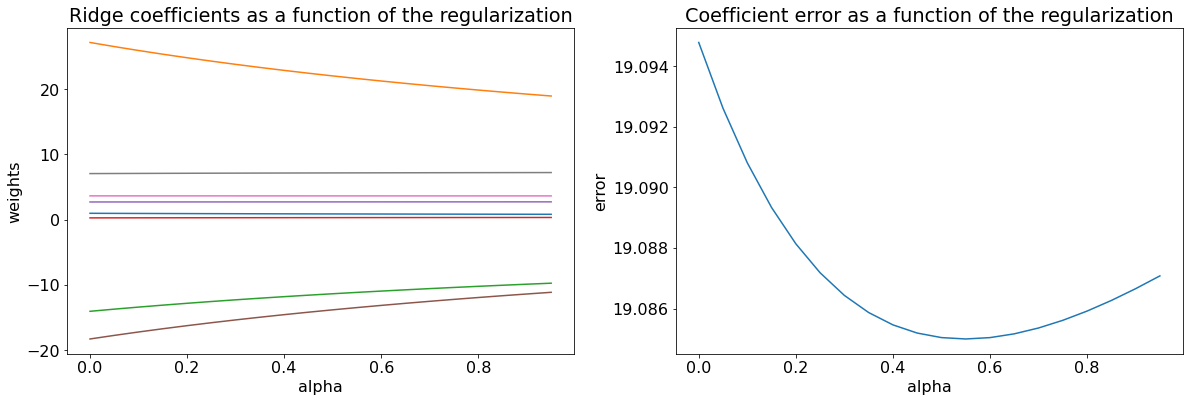

In [6]:
from sklearn.metrics import mean_squared_error
coefs = []
errors = []
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    errors.append(abs(mean(scores)))
# Display results
print(coefs)
print(len(coefs[0]))
plt.figure(figsize=(20, 6))

plt.subplot(121)
for i in range(8):
  plt.plot(alphas, [item[0][i] for item in coefs])
#plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
#ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

In [ ]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MSE: -19.085
Config: {'alpha': 0.55}


In [ ]:
results.best_estimator_.coef_

array([[  0.8615578 ,  21.63659352, -11.1627136 ,   0.30579975,
          2.71647836, -13.49154785,   3.6354832 ,   7.16682843]])

In [ ]:
array = ['Gender','Weight','Height','Smoker','Snorer','BMI','Age','Cervical']
print(array[1],array[2],array[5])

Weight Height BMI
